## A3: Predicting Car Price

From A1 and A2, I have preprocessed as follows:

#### 1. Import libraries and check version libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import matplotlib
import time
from sklearn.metrics import classification_report
from itertools import combinations_with_replacement
warnings.filterwarnings('ignore')

#### 2. Load data

In [2]:
df = pd.read_csv('Cars.csv')

In [3]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check the shape of data
df.shape

(8128, 13)

In [5]:
# Show basic statistics (count, mean, std, min, max, percentile)
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Check Dtypes of input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### 3. Data cleaning and preprocessing

- For the feature owner, map First owner to 1, ..., Test Drive Car to 5

In [8]:
# Define the custom mapping
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}

df["owner"] = df["owner"].map(owner_mapping)    # Apply the mapping to the 'owner' column
print(df["owner"].unique()) # Display unique mapped

[1 2 3 4 5]


In [9]:
# Check data after mapping
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


- For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmpl for Diesel and Petrol

<Axes: xlabel='fuel', ylabel='count'>

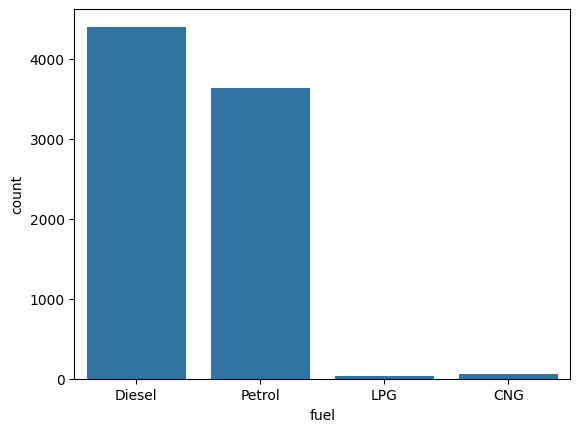

In [10]:
# Check number of row are CNG and LPG
sns.countplot(data = df, x = 'fuel')

In [11]:
# Check what index in the fuel column contains a value for CNG or LPG
index_to_drop = df[df["fuel"].isin(["CNG", "LPG"])].index

# Count number of rows
num_to_drop = len(index_to_drop)

# Show number of rows must remove and show the index contains a value for CNG or LPG
print(f"Number of rows to drop: {num_to_drop}")
print(f"Index to drop: {index_to_drop.tolist()}")

Number of rows to drop: 95
Index to drop: [6, 35, 90, 203, 402, 866, 870, 1225, 1239, 1350, 1511, 1658, 1907, 2047, 2108, 2166, 2253, 2312, 2466, 2481, 2484, 2513, 2518, 2525, 2527, 2573, 2579, 2588, 2613, 2618, 2730, 2740, 2758, 2767, 3010, 3042, 3050, 3200, 3216, 3306, 3466, 3492, 3751, 3796, 3823, 3826, 3853, 3908, 3912, 3956, 4004, 4045, 4542, 4545, 4933, 5034, 5057, 5133, 5185, 5198, 5199, 5206, 5277, 5322, 5436, 5437, 5457, 5532, 5557, 5578, 5749, 5768, 5784, 5789, 5792, 5793, 5815, 6007, 6253, 6338, 6488, 6536, 6651, 6856, 7040, 7101, 7112, 7166, 7245, 7300, 7308, 7543, 7642, 7733, 7913]


In [12]:
rows_before = len(df)   # Before remove
df = df.drop(index_to_drop) # Remove row are CNG and LPG
rows_after = len(df)    # After remove

print(f"Rows before drop: {rows_before}")
print(f"Rows after drop: {rows_after}")

Rows before drop: 8128
Rows after drop: 8033


- For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float). Hint: use df.mileage.str.split

In [13]:
df["mileage"] = df["mileage"].str.split(" ").str[0].astype(float)   # Split by space and keep only the first part

In [14]:
# Check 'mileage' column to verify the transformation
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [15]:
# Check the data type
print(df["mileage"].dtypes)

float64


- For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [16]:
df["engine"] = df["engine"].str.split(" ").str[0].astype(float)   # Split by space and keep only the first part

In [17]:
# Check 'engine' column to verify the transformation
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [18]:
# Check the data type
print(df["engine"].dtypes)

float64


- For the feature max_power, remove “bhp” and convert the column to numerical type (e.g., float)

In [19]:
df["max_power"] = df["max_power"].str.split(" ").str[0].astype(float)   # Split by space and keep only the first part

In [20]:
# Check 'max_power' column to verify the transformation
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [21]:
# Check the data type
print(df["max_power"].dtypes)

float64


- Drop unused features

In [22]:
df = df.drop('name', axis='columns')
df = df.drop('year', axis='columns')
df = df.drop('fuel', axis='columns')
df = df.drop('seller_type', axis='columns')
df = df.drop('transmission', axis='columns')
df = df.drop('torque', axis='columns')
df = df.drop('seats', axis='columns')

In [23]:
# Check after remove column
df.head()

,selling_price,km_driven,owner,mileage,engine,max_power
0,450000,145500,1,23.40,1248.0,74.00
1,370000,120000,2,21.14,1498.0,103.52
2,158000,140000,3,17.70,1497.0,78.00
3,225000,127000,1,23.00,1396.0,90.00
4,130000,120000,1,16.10,1298.0,88.20


- Next I will convert the label selling price into discrete variable by simply putting the price in a bucket of 0, 1, 2, 3

In [24]:
# Check min-max selling_price
df['selling_price'].describe()

count    8.033000e+03
mean     6.427361e+05
std      8.098635e+05
min      2.999900e+04
25%      2.600000e+05
50%      4.500000e+05
75%      6.800000e+05
max      1.000000e+07
Name: selling_price, dtype: float64

From data it show, max price is 10,000,000 and min price is 29,999. I use pd.qcut() to divide the selling price into four equal-frequency groups to ensure balanced class distribution.

In [25]:
df['selling_price'] = pd.qcut(df['selling_price'], q=4, labels=[0, 1, 2, 3])

In [26]:
# Check the distribution of each groups
df['selling_price'].value_counts()

selling_price
0    2050
1    2044
3    1996
2    1943
Name: count, dtype: int64

The selling prices were divided into four equally frequent groups using pd.qcut() to maintain class balance for classification. Class 0 represents the cheapest cars, while Class 3 represents the most expensive ones, as the selling prices were divided using pd.qcut() in ascending order.

In [27]:
df.head()

,selling_price,km_driven,owner,mileage,engine,max_power
0,1,145500,1,23.40,1248.0,74.00
1,1,120000,2,21.14,1498.0,103.52
2,0,140000,3,17.70,1497.0,78.00
3,0,127000,1,23.00,1396.0,90.00
4,0,120000,1,16.10,1298.0,88.20


- You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to involve this, we will simply delete all samples related to it.

dtype('int64')

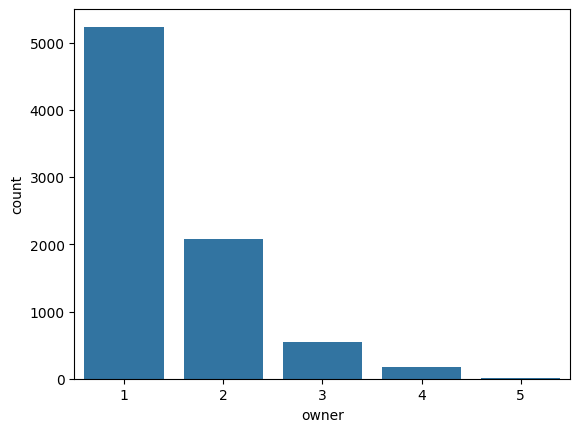

In [28]:
# Check number of row are "Test Drive Cars"
sns.countplot(data = df, x = 'owner')

'''
For mapping
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
'''

df["owner"].dtypes

In [29]:
# Check what index in the owner column contains a value '5'
index_to_drop_owner = df[df["owner"].isin([5])].index

# Count number of rows
num_to_drop_owner = len(index_to_drop_owner)

# Show number of rows must remove and show the index contains a value '5'
print(f"Number of rows to drop: {num_to_drop_owner}")
print(f"Index to drop: {index_to_drop_owner.tolist()}")

Number of rows to drop: 5
Index to drop: [4383, 4950, 4951, 4952, 6220]


In [30]:
rows_before = len(df)   # Before remove
df = df.drop(index_to_drop_owner) # Remove row is '5'
rows_after = len(df)    # After remove

print(f"Rows before drop: {rows_before}")
print(f"Rows after drop: {rows_after}")

Rows before drop: 8033
Rows after drop: 8028


<Axes: xlabel='owner', ylabel='count'>

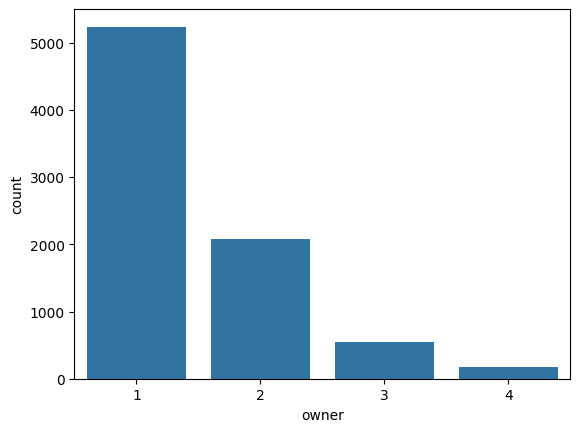

In [31]:
# Check data again
sns.countplot(data = df, x = 'owner')

- Check 'selling_price'

CategoricalDtype(categories=[0, 1, 2, 3], ordered=True, categories_dtype=int64)

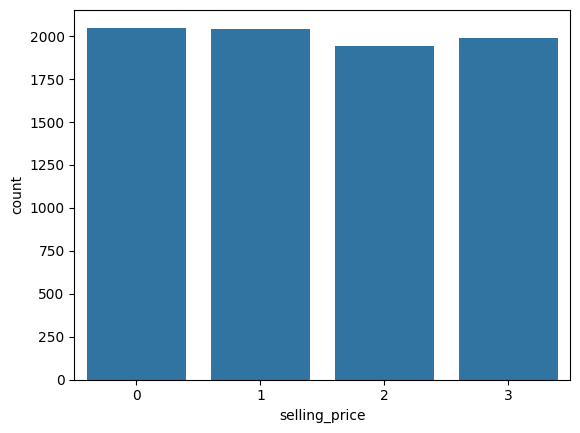

In [32]:
sns.countplot(data = df, x = 'selling_price')

'''
    'cheapest cars': 0,
    'most expensive': 3
'''

df["selling_price"].dtypes

In [33]:
# Check data
df.head()

,selling_price,km_driven,owner,mileage,engine,max_power
0,1,145500,1,23.40,1248.0,74.00
1,1,120000,2,21.14,1498.0,103.52
2,0,140000,3,17.70,1497.0,78.00
3,0,127000,1,23.00,1396.0,90.00
4,0,120000,1,16.10,1298.0,88.20


- Feature selection

In [34]:
#x is our strong features
X = df[        ['km_driven', 'owner', 'mileage', 'engine', 'max_power']        ]

#y is simply the selling_price col
y = df["selling_price"]

- After I get cleaned data I will split data to train set and test set

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

- Preprocessing train data

In [36]:
#check for null values
X_train[['km_driven', 'owner', 'mileage', 'engine', 'max_power']].isna().sum()

km_driven      0
owner          0
mileage      154
engine       154
max_power    149
dtype: int64

In [37]:
X_test[['km_driven', 'owner', 'mileage', 'engine', 'max_power']].isna().sum()

km_driven     0
owner         0
mileage      60
engine       60
max_power    59
dtype: int64

In [38]:
y_train.isna().sum()

np.int64(0)

In [39]:
y_test.isna().sum()

np.int64(0)

Preprocessing for mileage data

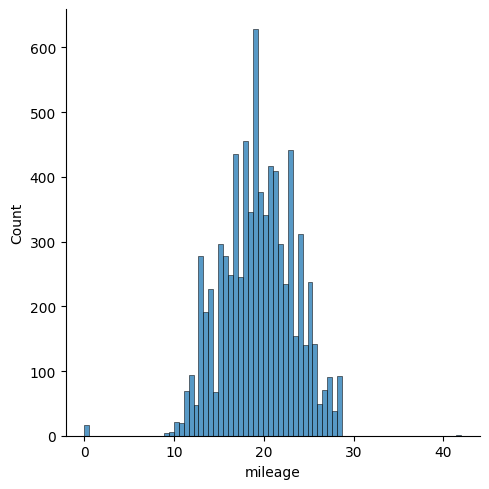

In [40]:
sns.displot(data=df, x='mileage')

In [41]:
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)

Preprocessing for engine data

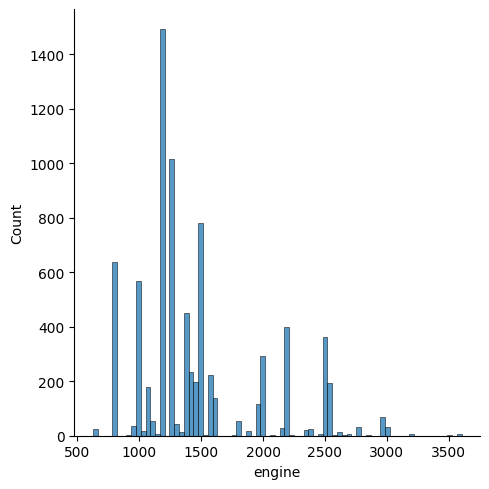

In [42]:
sns.displot(data=df, x='engine')

In [43]:
df.engine.mean(), df.engine.median()

(np.float64(1462.9146403890454), np.float64(1248.0))

In [44]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

Preprocessing for max power data

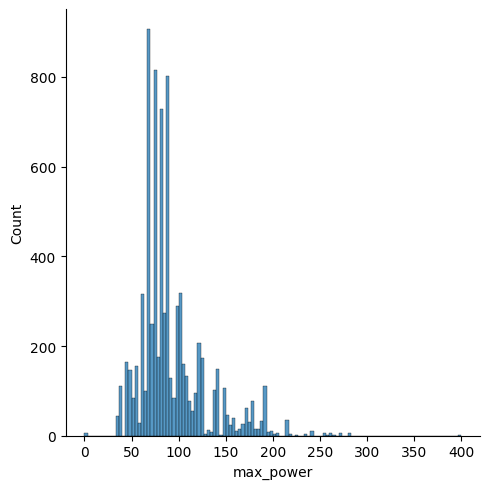

In [45]:
sns.displot(data=df, x='max_power')

In [46]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [47]:
# Check again
X_train[['km_driven', 'owner', 'mileage', 'engine', 'max_power']].isna().sum()

km_driven    0
owner        0
mileage      0
engine       0
max_power    0
dtype: int64

In [48]:
X_test[['km_driven', 'owner', 'mileage', 'engine', 'max_power']].isna().sum()

km_driven    0
owner        0
mileage      0
engine       0
max_power    0
dtype: int64

In [49]:
y_train.isna().sum()

np.int64(0)

In [50]:
y_test.isna().sum()

np.int64(0)

Checking Outliers

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   selling_price  8028 non-null   category
 1   km_driven      8028 non-null   int64   
 2   owner          8028 non-null   int64   
 3   mileage        7814 non-null   float64 
 4   engine         7814 non-null   float64 
 5   max_power      7820 non-null   float64 
dtypes: category(1), float64(3), int64(2)
memory usage: 384.4 KB


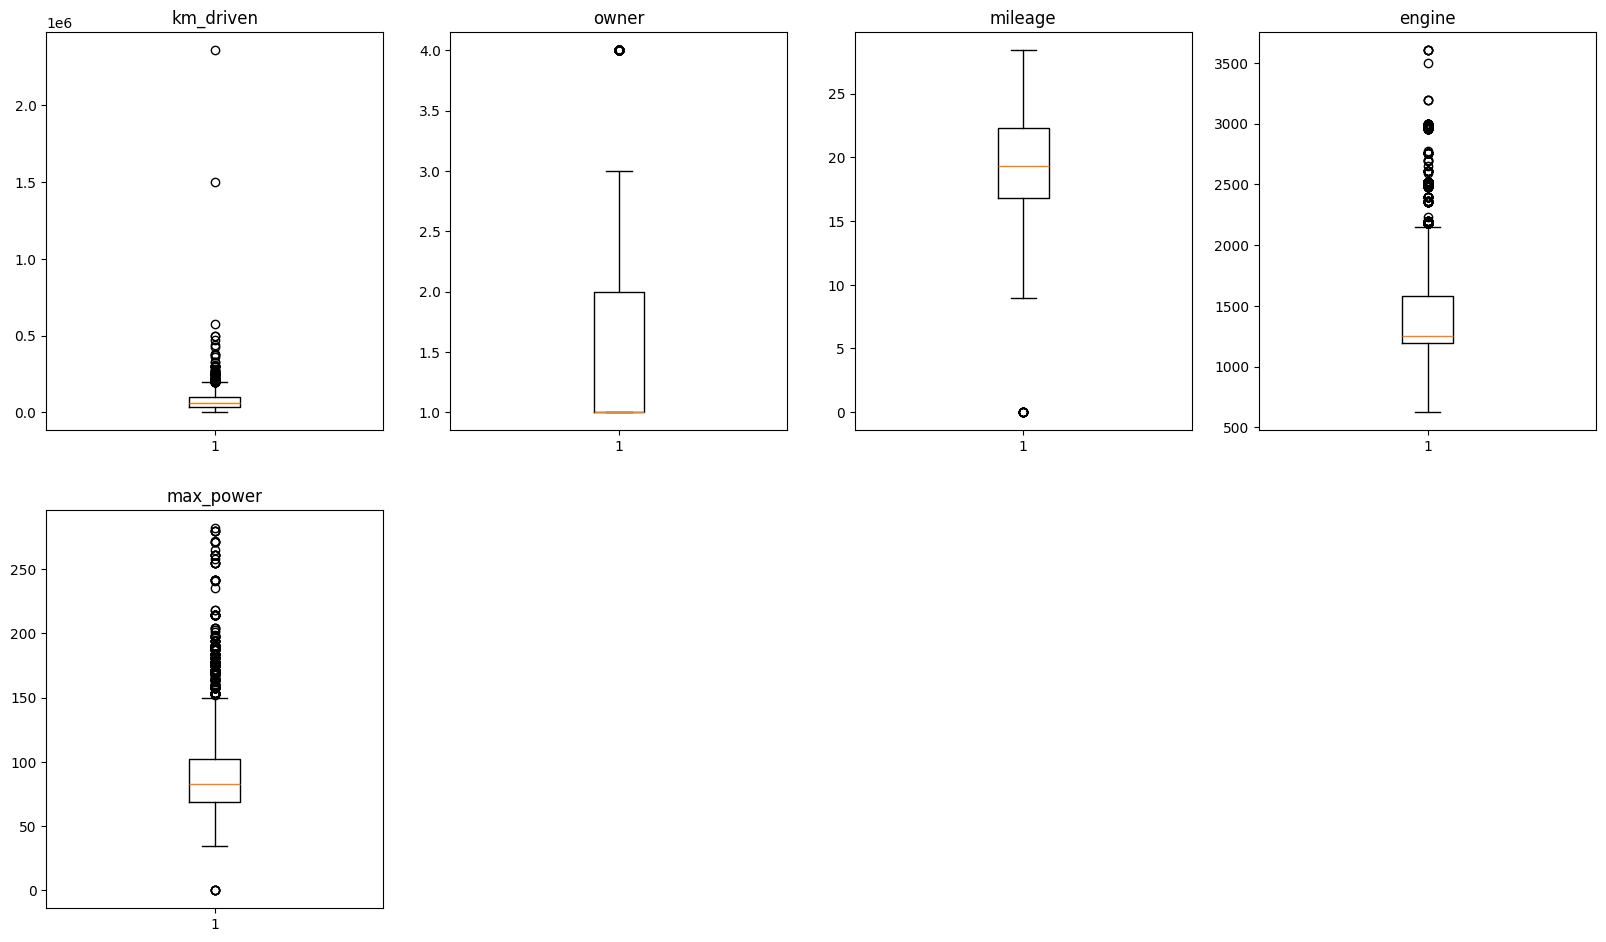

In [52]:
# Create a dictionary of columns.
col_dict = {'km_driven':1,'owner':2,'mileage':3,'engine':4,'max_power':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [53]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [54]:
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numeric_columns:
    outlier_count(col)


---------------km_driven---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%

---------------owner---------------

Number of outliers: 110
Percent of data that is outlier: 1.96%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%


In [55]:
X_train.head()

,km_driven,owner,mileage,engine,max_power
6853,120000,1,13.58,2499.0,72.40
1495,90000,2,15.96,2523.0,62.10
7904,92000,3,20.77,1248.0,88.76
1281,100000,2,18.80,1248.0,90.00
1421,120000,3,23.00,1396.0,90.00


In [56]:
X_test.head()

,km_driven,owner,mileage,engine,max_power
5948,35000,1,15.00,1368.0,90.00
6039,110000,1,19.67,1582.0,126.20
3069,60000,1,20.51,998.0,67.04
6531,80000,1,19.01,1461.0,108.45
322,29000,1,24.00,1186.0,73.97


Scaling data

In [57]:
from sklearn.preprocessing import StandardScaler
import joblib

# Select only high-value features for scaling
features_to_scale = ['km_driven', 'mileage', 'engine', 'max_power']

scaler = StandardScaler()

X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [58]:
X_train.head()

,km_driven,owner,mileage,engine,max_power
6853,0.830335,1,-1.472315,2.084278,-0.547545
1495,0.331836,2,-0.871732,2.132328,-0.838350
7904,0.365070,3,0.342052,-0.420314,-0.085646
1281,0.498003,2,-0.155069,-0.420314,-0.050636
1421,0.830335,3,0.904783,-0.124008,-0.050636


In [59]:
X_test.head()

,km_driven,owner,mileage,engine,max_power
5948,-0.582079,1,-1.113984,-0.180066,-0.050636
6039,0.664169,1,0.064471,0.248378,0.971416
3069,-0.166663,1,0.276442,-0.920833,-0.698877
6531,0.165670,1,-0.102077,0.006127,0.470272
322,-0.681778,1,1.157129,-0.544443,-0.503219


Check Null again

In [60]:
X_train[['km_driven', 'owner', 'mileage', 'engine', 'max_power']].isna().sum()

km_driven    0
owner        0
mileage      0
engine       0
max_power    0
dtype: int64

In [61]:
X_test[['km_driven', 'owner', 'mileage', 'engine', 'max_power']].isna().sum()

km_driven    0
owner        0
mileage      0
engine       0
max_power    0
dtype: int64

In [62]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 5)
Shape of X_test:  (2409, 5)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


### Task 1. Classification

First, I manually added an intercept term to the feature matrix to include the bias parameter in our custom logistic regression implementation.

In [63]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

Next, I convert the target vector into a one-hot encoded matrix to represent each class as a binary vector. This transformation is essential for performing multinomial logistic regression with softmax activation.

In [64]:
k = len(np.unique(y_train))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

Although reducing dimensionality is not mandatory for model training, we applied PCA to visualize the data in two dimensions, allowing us to observe the distribution and class separation

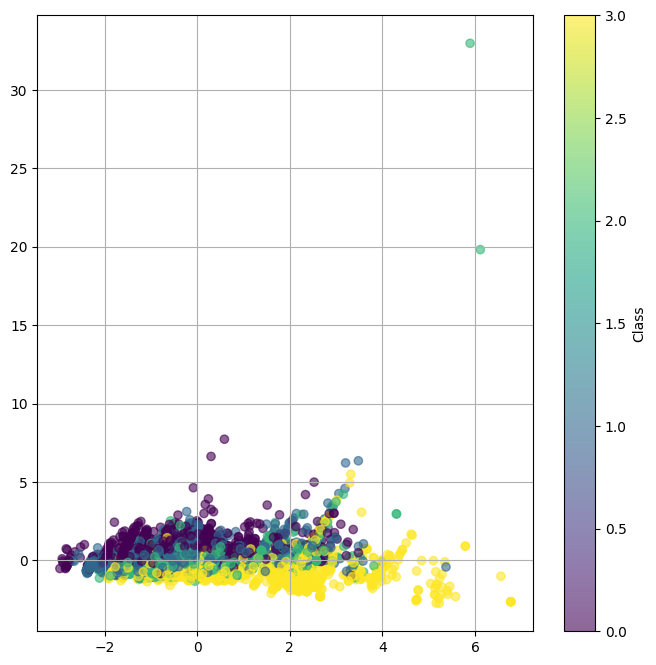

In [65]:
# Visualize our data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

plt.figure(figsize=(8, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='viridis', alpha=0.6)
plt.colorbar(label="Class")
plt.grid(True)
plt.show()

The scatter plot visualizes the data after dimensionality reduction, showing class distribution using different colors. While some clusters are visible, there is significant overlap between classes, indicating potential challenges in classification. Outliers are also observed, which may require further investigation

Next is the implementation of the things specified in the problem.

In [ ]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
    
    def accuracy(self, y_true, y_pred):
        correct = np.sum(y_true == y_pred)
        return correct / len(y_true)
    
    def precision(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FP = np.sum((y_true != class_label) & (y_pred == class_label))
        return TP / (TP + FP) if (TP + FP) > 0 else 0

    def recall(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FN = np.sum((y_true == class_label) & (y_pred != class_label))
        return TP / (TP + FN) if (TP + FN) > 0 else 0

    def f1_score(self, precision_value, recall_value):
        return 2 * (precision_value * recall_value) / (precision_value + recall_value) if (precision_value + recall_value) > 0 else 0

    def macro_precision(self, y_true, y_pred, num_classes):
        precision_scores = [self.precision(y_true, y_pred, c) for c in range(num_classes)]
        return np.mean(precision_scores)

    def weighted_precision(self, y_true, y_pred, num_classes):
        weights = []
        precision_scores = []
        total_samples = len(y_true)
        
        for c in range(num_classes):
            class_count = np.sum(y_true == c)  # จำนวนตัวอย่างของคลาสนั้น
            weight = class_count / total_samples  # น้ำหนักของคลาสนั้น
            weights.append(weight)
            precision_scores.append(self.precision(y_true, y_pred, c))
        
        weighted_prec = sum([w * p for w, p in zip(weights, precision_scores)])
        return weighted_prec
    
    def weighted_recall(self, y_true, y_pred, num_classes):
        weights = []
        recall_scores = []
        total_samples = len(y_true)
        
        for c in range(num_classes):
            class_count = np.sum(y_true == c)  # จำนวนตัวอย่างของคลาสนั้น
            weight = class_count / total_samples  # น้ำหนักของคลาสนั้น
            weights.append(weight)
            recall_scores.append(self.recall(y_true, y_pred, c))
        
        weighted_rec = sum([w * r for w, r in zip(weights, recall_scores)])
        return weighted_rec

    def weighted_f1(self, y_true, y_pred, num_classes):
        prec = self.weighted_precision(y_true, y_pred, num_classes)
        rec = self.weighted_recall(y_true, y_pred, num_classes)
        return self.f1_score(prec, rec)

Loss at iteration 0 1.5820809439122223
Loss at iteration 500 0.9201666709574334
Loss at iteration 1000 0.9992137805991463
Loss at iteration 1500 0.9165654263105744
Loss at iteration 2000 0.9294391370356502
Loss at iteration 2500 0.9167222395764852
Loss at iteration 3000 0.923367127014837
Loss at iteration 3500 0.9159155634433386
Loss at iteration 4000 0.9408006065668659
Loss at iteration 4500 0.9086779890044115
time taken: 0.7634069919586182
Accuracy: 0.5799086757990868
Class 0: Precision=0.67, Recall=0.76, F1-Score=0.72
Class 1: Precision=0.49, Recall=0.33, F1-Score=0.40
Class 2: Precision=0.43, Recall=0.56, F1-Score=0.48
Class 3: Precision=0.73, Recall=0.67, F1-Score=0.70
Macro Precision: 0.5809734825245519
Weighted Precision: 0.5830282576804119
Weighted Recall: 0.5799086757990868
Weighted F1-Score: 0.5814642825957798
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.67      0.76      0.72       633
           1

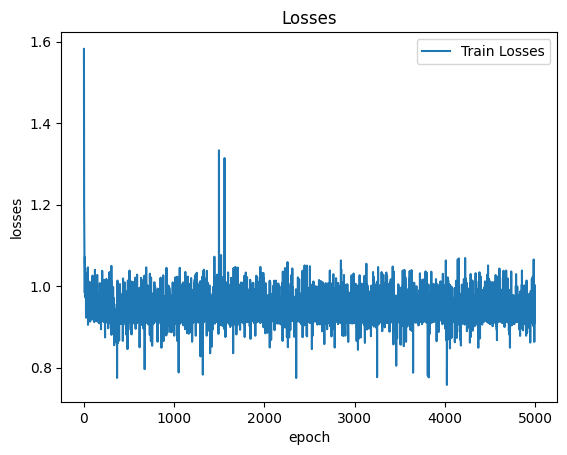

In [ ]:
model = LogisticRegression(k, X_train.shape[1], "minibatch")
model.fit(X_train, Y_train_encoded)
yhat = model.predict(X_test)
model.plot()

print(f"Accuracy: {model.accuracy(y_test, yhat)}")
for c in range(k):
    prec = model.precision(y_test, yhat, c)
    rec = model.recall(y_test, yhat, c)
    f1 = model.f1_score(prec, rec)
    print(f"Class {c}: Precision={prec:.2f}, Recall={rec:.2f}, F1-Score={f1:.2f}")

print(f"Macro Precision: {model.macro_precision(y_test, yhat, k)}")

print(f"Weighted Precision: {model.weighted_precision(y_test, yhat, 4)}")
print(f"Weighted Recall: {model.weighted_recall(y_test, yhat, 4)}")
print(f"Weighted F1-Score: {model.weighted_f1(y_test, yhat, 4)}")

print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

The implementation of Task 1 is complete, including accuracy, precision, recall, F1-score, macro precision, weighted precision, weighted recall, and weighted F1-score. The results from our custom implementation are consistent with the scikit-learn classification report, confirming the correctness of our approach

Task 1 Results: Comparison between Custom Model and Scikit-learn

| Metric              | Custom Model | Scikit-learn |
|---------------------|--------------|--------------|
| Accuracy            | 0.5799       | 0.58         |
| Macro Precision     | 0.5809       | 0.58         |
| Weighted Precision  | 0.5830       | 0.58         |
| Weighted Recall     | 0.5799       | 0.58         |
| Weighted F1-Score   | 0.5815       | 0.57         |

**Conclusion:** The results from my implementation closely match the Scikit-learn classification report, confirming the correctness of our approach. Therefore, Task 1 is successfully completed.

### Task 2. Ridge Logistic Regression

I modified our LogisticRegression class to allow users to optionally enable Ridge (L2) regularization. When enabled, the model includes an additional penalty term in the loss function to discourage large weights and reduce overfitting.

In [67]:
class LogisticRegression:
    
    def __init__(self, k, n, method, alpha = 0.001, max_iter=5000, use_penalty=False, lambda_=0.1):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.use_penalty = use_penalty  # Ridge Logistic
        self.lambda_ = lambda_
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
    #Add Ridge Penalty    
    def gradient(self, X, Y):
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y * np.log(h))  # Cross-Entropy Loss
        if self.use_penalty:    #lambda * sum(theta^2)
            loss += self.lambda_ * np.sum(np.square(self.W))
        
        error = h - Y
        grad = self.softmax_grad(X, error)

        if self.use_penalty:    #lambda * theta
            grad += self.lambda_ * self.W
    
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
    
    def accuracy(self, y_true, y_pred):
        correct = np.sum(y_true == y_pred)
        return correct / len(y_true)
    
    def precision(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FP = np.sum((y_true != class_label) & (y_pred == class_label))
        return TP / (TP + FP) if (TP + FP) > 0 else 0

    def recall(self, y_true, y_pred, class_label):
        TP = np.sum((y_true == class_label) & (y_pred == class_label))
        FN = np.sum((y_true == class_label) & (y_pred != class_label))
        return TP / (TP + FN) if (TP + FN) > 0 else 0

    def f1_score(self, precision_value, recall_value):
        return 2 * (precision_value * recall_value) / (precision_value + recall_value) if (precision_value + recall_value) > 0 else 0

    def macro_precision(self, y_true, y_pred, num_classes):
        precision_scores = [self.precision(y_true, y_pred, c) for c in range(num_classes)]
        return np.mean(precision_scores)

    def weighted_precision(self, y_true, y_pred, num_classes):
        weights = []
        precision_scores = []
        total_samples = len(y_true)
        
        for c in range(num_classes):
            class_count = np.sum(y_true == c)  # จำนวนตัวอย่างของคลาสนั้น
            weight = class_count / total_samples  # น้ำหนักของคลาสนั้น
            weights.append(weight)
            precision_scores.append(self.precision(y_true, y_pred, c))
        
        weighted_prec = sum([w * p for w, p in zip(weights, precision_scores)])
        return weighted_prec
    
    def weighted_recall(self, y_true, y_pred, num_classes):
        weights = []
        recall_scores = []
        total_samples = len(y_true)
        
        for c in range(num_classes):
            class_count = np.sum(y_true == c)  # จำนวนตัวอย่างของคลาสนั้น
            weight = class_count / total_samples  # น้ำหนักของคลาสนั้น
            weights.append(weight)
            recall_scores.append(self.recall(y_true, y_pred, c))
        
        weighted_rec = sum([w * r for w, r in zip(weights, recall_scores)])
        return weighted_rec

    def weighted_f1(self, y_true, y_pred, num_classes):
        prec = self.weighted_precision(y_true, y_pred, num_classes)
        rec = self.weighted_recall(y_true, y_pred, num_classes)
        return self.f1_score(prec, rec)

### Task 3. Deployment

- Objective 1: Log experiment on the server.

In [69]:
#Set tracking_uri
import mlflow
import os

os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/")
mlflow.set_experiment("st124879-a3")

2025/04/05 19:13:49 INFO mlflow.tracking.fluent: Experiment with name 'st124879-a3' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/116411965365937607', creation_time=1743880839418, experiment_id='116411965365937607', last_update_time=1743880839418, lifecycle_stage='active', name='st124879-a3', tags={}>

In [70]:
#Hyperparameters
methods = ['batch', 'minibatch', 'sto']
alphas  = [0.01, 0.001, 0.0001]
lambdas = [0, 0.1, 0.5]  # 0: no regularization

In [71]:
import itertools

for method, alpha, lambda_ in itertools.product(methods, alphas, lambdas):
    run_name = f"{method}_alpha{alpha}_lambda{lambda_}"
    
    if mlflow.active_run():
        mlflow.end_run()
    
    with mlflow.start_run(run_name=run_name):
        # ✅ Train Model
        use_penalty = lambda_ > 0
        model = LogisticRegression(k, X_train.shape[1], method=method,
                                   alpha=alpha, max_iter=5000,
                                   use_penalty=use_penalty, lambda_=lambda_)
        model.fit(X_train, Y_train_encoded)

        yhat = model.predict(X_test)
        acc = model.accuracy(y_test, yhat)
        macro_prec = model.macro_precision(y_test, yhat, k)
        weighted_f1 = model.weighted_f1(y_test, yhat, k)

        # ✅ Log Parameters
        mlflow.log_param("method", method)
        mlflow.log_param("alpha", alpha)
        mlflow.log_param("lambda", lambda_)

        # ✅ Log Metrics
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("macro_precision", macro_prec)
        mlflow.log_metric("weighted_f1", weighted_f1)

        print(f"[{run_name}] Accuracy: {acc:.4f}, Weighted F1: {weighted_f1:.4f}")


Loss at iteration 0 8182.408306848991
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.078906774520874
[batch_alpha0.01_lambda0] Accuracy: 0.2628, Weighted F1: 0.1094
🏃 View run batch_alpha0.01_lambda0 at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/116411965365937607/runs/59c64c81b2124fa29bf04bb81128d784
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/116411965365937607
Loss at iteration 0 8623.371473339814
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 2.1049373149871826
[batch_alpha0.01_lambda0.1] Accuracy: 0.2628, Weighted F1: 0.1094
🏃 View run

#### Grid Search Results (Objective 1)

I performed grid search using different learning rates (`alpha`), optimization methods (`method`), and L2 regularization strengths (`lambda_`). Each combination was evaluated and logged in MLflow.

**Best performing configuration:**
- Method: `minibatch` (stochastic gradient descent)
- Alpha: `0.0001`
- Lambda: `0.5`
- Accuracy: **0.59**
- Macro Precision: **0.59**
- Weighted F1: **0.59**

This configuration will be used to retrain and log the final model for deployment in Task 3.


- Objective 2: Deploy the Model.

In [72]:
#Create a wrapper class for pyfunc
import mlflow.pyfunc

class LogisticRegressionWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self, model):
        self.model = model 

    def predict(self, context, model_input):
        # model_input is np.array
        if isinstance(model_input, pd.DataFrame):
            model_input = model_input.values
        return self.model.predict(model_input)

e:\Jan_2025\ML\A3\A3_env\lib\site-packages\mlflow\pyfunc\utils\data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


In [ ]:
#Log final model to MLflow
final_model = LogisticRegression(
    k=k,
    n=X_train.shape[1],
    method="minibatch",
    alpha=0.0001,
    max_iter=5000,
    use_penalty=True,
    lambda_=0.5
)

final_model.fit(X_train, Y_train_encoded)
yhat = final_model.predict(X_test)

with mlflow.start_run(run_name="final_model_log"):
    # Log params and metrics
    mlflow.log_param("method", final_model.method)
    mlflow.log_param("alpha", final_model.alpha)
    mlflow.log_param("lambda", final_model.lambda_)
    mlflow.log_param("use_penalty", final_model.use_penalty)
    
    acc = final_model.accuracy(y_test, yhat)
    mlflow.log_metric("accuracy", acc)

    # Log model
    mlflow.pyfunc.log_model(
        artifact_path="model",
        python_model=LogisticRegressionWrapper(final_model),
        registered_model_name="st124879-a3-model"
    )

Loss at iteration 0 1653.2040730340366
Loss at iteration 500 412.40205638335266
Loss at iteration 1000 1572.2240439228924
Loss at iteration 1500 661.347579553509
Loss at iteration 2000 994.3893046375449
Loss at iteration 2500 1562.3235968751414
Loss at iteration 3000 1556.8054446013925
Loss at iteration 3500 1593.9171832730485
Loss at iteration 4000 1594.7717956310657
Loss at iteration 4500 370.1717040733701
time taken: 0.7543256282806396


2025/04/05 19:32:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'car_price_classifier'.
2025/04/05 19:32:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: car_price_classifier, version 1
Created version '1' of model 'car_price_classifier'.


🏃 View run final_model_log at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/116411965365937607/runs/c592fd0b773c47c2b37bb4a213d332cb
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/116411965365937607


In [ ]:
#Test download model and use
loaded_model = mlflow.pyfunc.load_model("models:/st124879-a3-model/1")
loaded_model.predict(X_test)

array([2, 3, 0, ..., 0, 3, 0])

I wrapped my custom LogisticRegression model using `mlflow.pyfunc.PythonModel` and registered it as `car_price_classifier`. This allows the model to be versioned and deployed through MLflow. The model was logged along with its hyperparameters and accuracy metric.

- Objective 3: CI/CD.

I created unit tests to validate our custom logistic regression model. The first test checks whether the model accepts input with the expected shape. The second test ensures that the output has the correct shape.

In [ ]:
#test_model.py
import unittest
import numpy as np
from LogisticRegression import LogisticRegression

class TestLogisticRegression(unittest.TestCase):
    def setUp(self):
        # Create model with weight like mock
        self.model = LogisticRegression(k=4, n=5, method='batch', use_penalty=False)
        self.model.W = np.random.rand(5, 4)

    def test_model_input(self):
        X_sample = np.random.rand(10, 5)  # (m=10, n=5)
        try:
            self.model.predict(X_sample)
        except Exception as e:
            self.fail(f"Model failed with valid input: {e}")

    def test_model_output_shape(self):
        X_sample = np.random.rand(7, 5)
        pred = self.model.predict(X_sample)
        self.assertEqual(pred.shape, (7,))

I created train.py following below.

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
import mlflow
import mlflow.pyfunc
from LogisticRegression import LogisticRegression

# === Load data and preprocessin ===
df = pd.read_csv("Cars.csv")

owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}
df["owner"] = df["owner"].map(owner_mapping)

df = df[~df["fuel"].isin(["CNG", "LPG"])]

df["mileage"] = df["mileage"].str.split(" ").str[0].astype(float)
df["engine"] = df["engine"].str.split(" ").str[0].astype(float)
df["max_power"] = df["max_power"].str.split(" ").str[0].astype(float)

df = df.drop(columns=[
    'name', 'year', 'fuel', 'seller_type', 'transmission', 'torque', 'seats'
])

df['selling_price'] = pd.qcut(df['selling_price'], q=4, labels=[0, 1, 2, 3])

df = df[df["owner"] != 5]

X = df[['km_driven', 'owner', 'mileage', 'engine', 'max_power']]
y = df['selling_price'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

for col in ['mileage', 'engine', 'max_power']:
    X_train[col].fillna(X_train[col].median(), inplace=True)
    X_test[col].fillna(X_train[col].median(), inplace=True)

features_to_scale = ['km_driven', 'mileage', 'engine', 'max_power']
scaler = StandardScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])
joblib.dump(scaler, 'scaler.pkl')

k = len(y.unique())
Y_train_encoded = np.zeros((y_train.shape[0], k))
for i, label in enumerate(y_train):
    Y_train_encoded[i, label] = 1

# === Train model ===
model = LogisticRegression(
    k=k,
    n=X_train.shape[1],
    method="sto",
    alpha=0.01,
    max_iter=5000,
    use_penalty=False,
    lambda_=0
) 
model.fit(X_train.values, Y_train_encoded)
yhat = model.predict(X_test.values)

class LogisticRegressionWrapper(mlflow.pyfunc.PythonModel):
    def __init__(self, model):
        self.model = model
    def predict(self, context, model_input):
        if isinstance(model_input, pd.DataFrame):
            model_input = model_input.values
        return self.model.predict(model_input)

# === Log to MLflow ===
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th/")
mlflow.set_experiment("st124879-a3")
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'

with mlflow.start_run(run_name="final_model_log"):
    mlflow.log_param("method", model.method)
    mlflow.log_param("alpha", model.alpha)
    mlflow.log_param("lambda", model.lambda_)
    mlflow.log_param("use_penalty", model.use_penalty)
    mlflow.log_metric("accuracy", model.accuracy(y_test.values, yhat))

    mlflow.pyfunc.log_model(
        artifact_path="model",
        python_model=LogisticRegressionWrapper(model),
        registered_model_name="st124879-a3-model"
    )

print("✅ Training complete and model logged to MLflow.")

After that, I made a requirements.txt file with mlflow, numpy, pandas, scikit-learn, and joblib. I also made a LogisticRegression.py file with my own LogisticRegression class.

#### GitHub Actions Workflow: .github/workflows/test.yml

To enable continuous integration (CI), I created a GitHub Actions workflow file named `test.yml` under `.github/workflows/`.

This workflow is automatically triggered whenever I push new commits to the `main` branch. It performs the following steps:

1. **Check out the repository** – It pulls the latest version of the code.
2. **Set up the Python environment** – Installs Python 3.9.
3. **Install dependencies** – Installs all required libraries from `requirements.txt`.
4. **Run unit tests** – Runs the test script `test_model.py` to ensure that the logistic regression model handles input and output correctly.
5. **Train and log the model** – If the test passes, the workflow runs `train.py` to train and log the model to the MLflow server.

This CI pipeline helps ensure that every update to the code is tested and that the latest model version is always available and reproducible.


In this objective, I implemented a basic CI/CD pipeline.  
I created the following files to support the automation process:

- `LogisticRegression.py` – Contains the implementation of multinomial logistic regression.
- `train.py` – Loads and preprocesses the dataset, trains the model, and logs it to the MLflow server.
- `test_model.py` – Contains unit tests that validate the model's input handling and output shape.
- `requirements.txt` – Lists the required Python packages for the project.